In [129]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# 이미지 불러오기  (-1 : 이미지 그대로 불러오기, 0 : 흑백으로 불러오기, 1 : 알파 채널 무시한 컬러 이미지 불러오기)
src = cv2.imread('Example Student ID Card2.jpg', -1)
src = cv2.resize(src, (0, 0), fx=0.5, fy=0.5)
dst = src.copy()

# h, w, c
print(src.shape)

if src is None:
    print('Image load failed!')
    sys.exit()
    
# 이미지 분할
rgb_planes = cv2.split(src)

result_planes = []
result_norm_planes = []
for plane in rgb_planes:
    # 팽창 연산을 통해 배경 이미지 생성
    dilated_img = cv2.dilate(plane, np.ones((7,7), np.uint8))
    
    # 배경 이미지를 이용하여 중간 픽셀값 계산
    bg_img = cv2.medianBlur(dilated_img, 21)
 
    # 중간 픽셀값과 입력 이미지의 차이 계산
    diff_img = 255 - cv2.absdiff(plane, bg_img)
    
    # 차이 이미지를 정규화하여 그림자를 강조
    norm_img = cv2.normalize(diff_img,None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
    
    # 결과 이미지 리스트에 추가
    result_planes.append(diff_img)
    result_norm_planes.append(norm_img)

# 결과 이미지에 합침
result = cv2.merge(result_planes)
result_norm = cv2.merge(result_norm_planes)

cv2.imshow('shadows_out.png', result)
cv2.imshow('shadows_out_norm.png', result_norm)
cv2.waitKey(0)
cv2.destroyAllWindows()

(540, 720, 3)


In [130]:
# sub함수로 어둡게 설정
val = 100
array = np.full(result_norm.shape, (val, val, val), dtype=np.uint8)

sub = cv2.subtract(result_norm, array)

cv2.imshow("sub", sub)
cv2.waitKey(0)
cv2.destroyAllWindows()

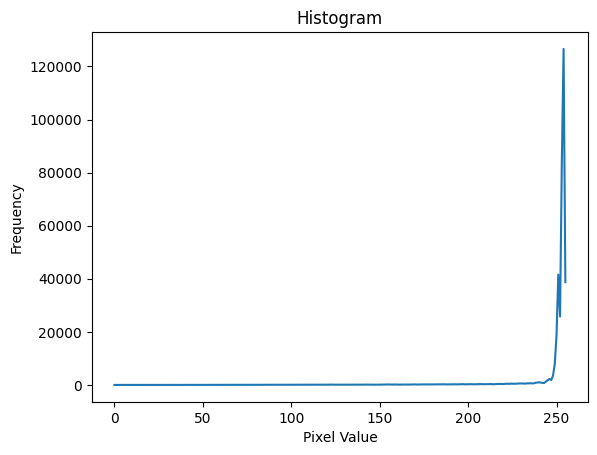

In [131]:
src_gray = cv2.cvtColor(result_norm, cv2.COLOR_BGR2GRAY)

# 히스토그램 계산
hist = cv2.calcHist([src_gray], [0], None, [256], [0, 256])

# 히스토그램 그래프 그리기
plt.plot(hist)
plt.title('Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

cv2.imshow('src_gray', src_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [132]:
# 가우시안 블러
src_blurred = cv2.GaussianBlur(src_gray, ksize=(7, 7), sigmaX=0)

cv2.imshow('src_blurred', src_blurred)
cv2.waitKey(0)
cv2.destroyAllWindows()

145.0


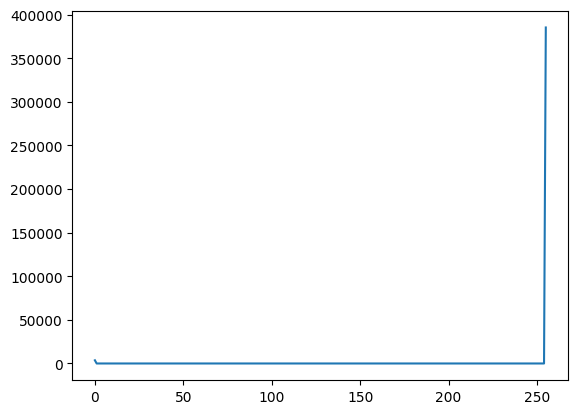

In [133]:
# 이진화 - otsu
ret, src_thresh = cv2.threshold(src_blurred, 145, 255, cv2.THRESH_BINARY)
print(ret)

# 히스토그램
hist = cv2.calcHist([src_thresh], [0], None, [256], [0,256]) # 꼭 리스트 형태로 입력

plt.plot(hist)
plt.show()

cv2.imshow('src_thresh', src_thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [134]:
# 수직 투사로 x축 확인
vertical_projection = np.sum(src_thresh, axis=0)

# 수직 투사 결과 확인
print("수직 투사 결과:", vertical_projection)

# 수평 투사로 y축 확인
horizontal_projection = np.sum(src_thresh, axis=1)

# 수평 투사 결과 확인
print("수평 투사 결과:", horizontal_projection)

수직 투사 결과: [137700 137700 137700 137700 137700 137700 137700 137700 137700 137700
 137700 137700 137700 137700 137700 137700 137700 137700 137700 137700
 137700 137700 137700 137700 137700 137700 137700 137700 137700 137700
 137700 137700 137700 137700 137700 137700 137700 137700 137700 137700
 137700 137700 137700 137700 137700 137700 137700 137700 137700 137700
 137700 137700 137700 137700 137700 137700 137700 137700 137700 137700
 137700 137700 137700 137700 137700 137700 137700 137700 137700 137700
 137700 137700 137700 137700 137700 137700 137700 137700 137700 137700
 137700 137700 137700 137700 137700 137700 137700 137700 137700 137700
 137700 137700 137700 137700 137700 137700 137700 137700 137700 137700
 137700 137700 137700 137700 137700 137700 137700 137700 137445 137445
 137445 137445 137445 137445 137700 137445 137445 137445 137445 137445
 137190 137190 137190 137445 137190 137190 137190 136935 136935 137190
 137190 137190 136935 137190 137190 136935 136935 136935 137190 136

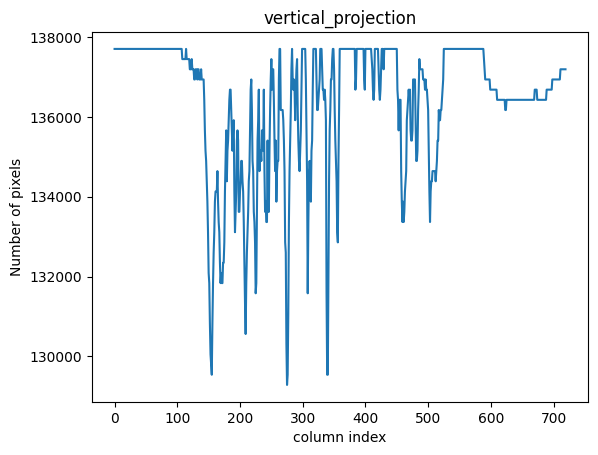

In [135]:
# 수직 투사 그래프로 표현
plt.plot(vertical_projection)
plt.xlabel("column index")
plt.ylabel("Number of pixels")
plt.title("vertical_projection")
plt.show()

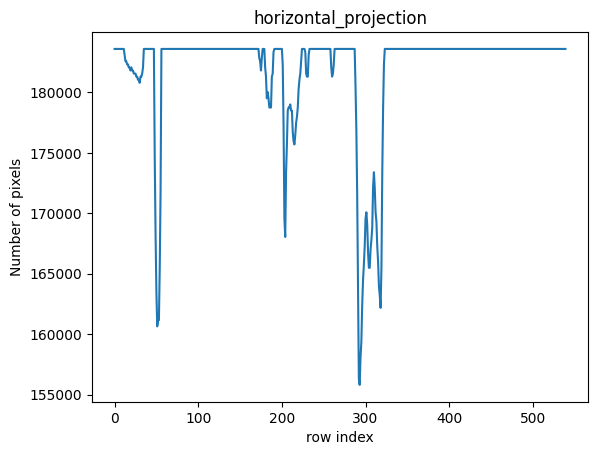

In [136]:
# 수평 투사 그래프로 표현
plt.plot(horizontal_projection)
plt.xlabel("row index")
plt.ylabel("Number of pixels")
plt.title("horizontal_projection")
plt.show()

In [137]:
# 리사이즈할 이미지의 크기
new_size = (200, 200)  # 새로운 크기 (가로, 세로)

# 수직 투사와 수평 투사의 범위 조정 비율
vertical_ratio = 0.2  # 수직 투사 범위 조정 비율
horizontal_ratio = 0.2  # 수평 투사 범위 조정 비율

# 수직 투사의 픽셀 값 범위 설정
vertical_range = (np.min(vertical_projection), np.max(vertical_projection))
vertical_threshold = vertical_range[0] + vertical_ratio * (vertical_range[1] - vertical_range[0])

# 수평 투사의 픽셀 값 범위 설정
horizontal_range = (np.min(horizontal_projection), np.max(horizontal_projection))
horizontal_threshold = horizontal_range[0] + horizontal_ratio * (horizontal_range[1] - horizontal_range[0])

# 픽셀 값에 해당하는 인덱스 추출
vertical_indices = np.where(vertical_projection >= vertical_threshold)[0]
horizontal_indices = np.where(horizontal_projection >= horizontal_threshold)[0]

# 추출된 인덱스에 해당하는 부분 이미지 리사이즈
cropped_image = src_gray[vertical_indices[0]:vertical_indices[-1], horizontal_indices[0]:horizontal_indices[-1]]
resized_image = cv2.resize(cropped_image, new_size)

# 이미지 출력 또는 저장
cv2.imshow("Original Image", src_gray)
cv2.imshow("Resized Image", resized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()